In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import scipy.stats as stats

# **Parte 1**. EDA

In [162]:
# Cargar el dataset
original_df = pd.read_csv('../../../data/raw/power_tetouan_city_original.csv')
modified_df = pd.read_csv('../../../data/raw/power_tetouan_city_modified.csv')

print(f"\n• Dataset Original cargado: {original_df.shape}")
print(f"• Dataset Modificado cargado: {modified_df.shape}")


• Dataset Original cargado: (52416, 9)
• Dataset Modificado cargado: (53464, 10)


In [163]:
# Visualizar las primeras filas del dataset original
original_df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [164]:
# Visualizar las primeras filas del dataset modificado
modified_df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,mixed_type_col
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,NaN,34055.6962,16128.87538,20240.96386,624
1,1/1/2017 0:10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,811
2,1/1/2017 0:20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373,unknown
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,bad
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.6962,17872.34043,18442.40964,879


In [165]:
# Información del dataset original
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [166]:
# información del dataset modificado
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53464 entries, 0 to 53463
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DateTime                   52977 non-null  object
 1   Temperature                52880 non-null  object
 2   Humidity                   52826 non-null  object
 3   Wind Speed                 52846 non-null  object
 4   general diffuse flows      52838 non-null  object
 5   diffuse flows              52849 non-null  object
 6   Zone 1 Power Consumption   52861 non-null  object
 7   Zone 2  Power Consumption  52839 non-null  object
 8   Zone 3  Power Consumption  52889 non-null  object
 9   mixed_type_col             48162 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


In [167]:
# Estadísticas descriptivas del dataset original
original_df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [168]:
# Estadísticas descriptivas del dataset modificado
modified_df.describe()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,mixed_type_col
count,52977,52880,52826,52846,52838,52849,52861,52839,52889,48162
unique,52036,5446,6291,1187,11915,11923,29720,31474,25057,1002
top,NAN,?,84.6,0.082,0.055,0.115,?,error,error,unknown
freq,21,57,182,2179,1488,1196,57,50,50,5521


In [169]:
# Nombres de las columnas del dataset original
original_df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [170]:
# Nombres de las columnas del dataset modificado
modified_df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
       'mixed_type_col'],
      dtype='object')

In [171]:
# Revisión de valores únicos por columna en el dataset original
for i in original_df.columns:
    print(i,':',original_df[i].nunique())

DateTime : 52416
Temperature : 3437
Humidity : 4443
Wind Speed : 548
general diffuse flows : 10504
diffuse flows : 10449
Zone 1 Power Consumption : 27709
Zone 2  Power Consumption : 29621
Zone 3  Power Consumption : 22838


In [172]:
# Revisión de valores únicos por columna en el dataset modificado
for i in modified_df.columns:
    print(i,':',modified_df[i].nunique())

DateTime : 52036
Temperature : 5446
Humidity : 6291
Wind Speed : 1187
general diffuse flows : 11915
diffuse flows : 11923
Zone 1 Power Consumption : 29720
Zone 2  Power Consumption : 31474
Zone 3  Power Consumption : 25057
mixed_type_col : 1002


In [173]:
# Revisión de valores nulos en el dataset original
original_df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [174]:
# Revisión de valores nulos en el dataset modificado
modified_df.isnull().sum()

DateTime                      487
Temperature                   584
Humidity                      638
Wind Speed                    618
general diffuse flows         626
diffuse flows                 615
Zone 1 Power Consumption      603
Zone 2  Power Consumption     625
Zone 3  Power Consumption     575
mixed_type_col               5302
dtype: int64

In [175]:
# Porcentaje de valores nulos por columna en el dataset modificado
pd.DataFrame((modified_df.isnull().mean() * 100).round(2), columns=['avg_nan'])

,avg_nan
DateTime,0.91
Temperature,1.09
Humidity,1.19
Wind Speed,1.16
general diffuse flows,1.17
diffuse flows,1.15
Zone 1 Power Consumption,1.13
Zone 2 Power Consumption,1.17
Zone 3 Power Consumption,1.08
mixed_type_col,9.92


# **Parte 2**. Preprocesamiento

In [176]:
# Copiamos el dataset modificado para trabajar con él
#cleaned_df = original_df.copy()
cleaned_df = modified_df.copy()

## Limpieza del Dataset

#### Normalizar el Nombre de las columnas

In [177]:
# Normalizar los nombres de columnas
cleaned_df.columns = (
    cleaned_df.columns
    .str.strip()                            # Quita espacios al inicio y al final
    .str.lower()                            # Convierte a minúsculas
    .str.replace(r'\s+', '_', regex=True)   # Reemplaza uno o más espacios por _
)

# Verificar resultado
print("Columnas homologadas:")
print(cleaned_df.columns.tolist())

Columnas homologadas:
['datetime', 'temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'zone_1_power_consumption', 'zone_2_power_consumption', 'zone_3_power_consumption', 'mixed_type_col']


### Eliminación de Columnas Inecesarias

In [178]:
# Eliminamos la columna mixed_type_col por tener un porcentaje alto de valores nulos > al 5%
cleaned_df.drop(columns=['mixed_type_col'], inplace=True)

In [179]:
print(f"Total de Columnas: {cleaned_df.shape[1]}, Columnas: {cleaned_df.columns} ")

Total de Columnas: 9, Columnas: Index(['datetime', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'zone_1_power_consumption',
       'zone_2_power_consumption', 'zone_3_power_consumption'],
      dtype='object') 


### Tratamiento de la caracteristica DateTime

In [180]:
# Filas con 'DateTime' convertible
total_total_filas = cleaned_df.shape[0]
filas_sin_datetime = cleaned_df['datetime'].isna().sum()
print(f"Filas con 'DateTime' no convertible: {filas_sin_datetime}")

# Eliminamos las filas con 'DateTime' no convertible
cleaned_df = cleaned_df[cleaned_df['datetime'].notna()] 
print("Después de eliminar filas con 'DateTime' no convertible:")   
print(f"Filas originales: {total_total_filas} ") 
print(f"Filas eliminadas: {filas_sin_datetime} ")
print(f"Total de Filas: {cleaned_df.shape[0]} ")

Filas con 'DateTime' no convertible: 487
Después de eliminar filas con 'DateTime' no convertible:
Filas originales: 53464 
Filas eliminadas: 487 
Total de Filas: 52977 


In [181]:
# Limpieza de espacios en blanco en la columna 'datetime'
cleaned_df['datetime'] = cleaned_df['datetime'].astype(str).str.strip()

# Parsear la columna 'datetime' a formato datetime
cleaned_df['datetime_parsed'] = pd.to_datetime(cleaned_df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Verificar filas con 'datetime_parsed' no convertible
invalid_rows = cleaned_df[cleaned_df['datetime_parsed'].isna()]
print(f"Filas con 'datetime_parsed' no convertible: {invalid_rows.shape[0]}")

# Elimina datetime_parced no convertible
total_total_filas = cleaned_df.shape[0]
cleaned_df = cleaned_df[cleaned_df['datetime_parsed'].notna()]
print("Después de eliminar filas con 'datetime_parsed' no convertible:")   
print(f"Filas originales: {total_total_filas} ") 
print(f"Filas eliminadas: {invalid_rows.shape[0]} ")
print(f"Total de Filas: {cleaned_df.shape[0]} ")


Filas con 'datetime_parsed' no convertible: 21
Después de eliminar filas con 'datetime_parsed' no convertible:
Filas originales: 52977 
Filas eliminadas: 21 
Total de Filas: 52956 


In [182]:
# Se reemplazar la columna original con la columna datetime_parsed
cleaned_df['datetime'] = cleaned_df['datetime_parsed']

# Eliminación de la columna temporal datetime_parsed
cleaned_df.drop(columns=['datetime_parsed'], inplace=True)

# Ordenamiento del DataFrame por la columna 'datetime' y reinicio de los índices
cleaned_df = cleaned_df.sort_values('datetime')
cleaned_df.reset_index(drop=True, inplace=True)

# Verificación de la estructura final
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52956 entries, 0 to 52955
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  52956 non-null  datetime64[ns]
 1   temperature               52377 non-null  object        
 2   humidity                  52324 non-null  object        
 3   wind_speed                52342 non-null  object        
 4   general_diffuse_flows     52334 non-null  object        
 5   diffuse_flows             52346 non-null  object        
 6   zone_1_power_consumption  52356 non-null  object        
 7   zone_2_power_consumption  52337 non-null  object        
 8   zone_3_power_consumption  52386 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.6+ MB


### Tratamiento de los caracteristicas númericas

In [183]:
# Identificar las columnas tipo 'object', excluyendo 'datetime'
object_cols = cleaned_df.select_dtypes(include=['object']).columns
numeric_cols = list(filter(lambda col: col != 'datetime', object_cols))

# Convertir esas columnas a tipo float (maneja errores con coerción)
for col in numeric_cols:        
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Verificar los tipos de datos resultantes
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52956 entries, 0 to 52955
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  52956 non-null  datetime64[ns]
 1   temperature               52172 non-null  float64       
 2   humidity                  52129 non-null  float64       
 3   wind_speed                52164 non-null  float64       
 4   general_diffuse_flows     52137 non-null  float64       
 5   diffuse_flows             52154 non-null  float64       
 6   zone_1_power_consumption  52160 non-null  float64       
 7   zone_2_power_consumption  52178 non-null  float64       
 8   zone_3_power_consumption  52216 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


#### Manejo de NANs para Columnas Númericas

In [184]:
# conteo de datos nulos por columna después de la conversión
cleaned_df.isna().sum()

datetime                      0
temperature                 784
humidity                    827
wind_speed                  792
general_diffuse_flows       819
diffuse_flows               802
zone_1_power_consumption    796
zone_2_power_consumption    778
zone_3_power_consumption    740
dtype: int64

In [185]:
# Porcentaje de valores nulos por columna en el dataset modificado
pd.DataFrame((cleaned_df.isnull().mean() * 100).round(2), columns=['avg_nan'])

,avg_nan
datetime,0.00
temperature,1.48
humidity,1.56
wind_speed,1.50
general_diffuse_flows,1.55
diffuse_flows,1.51
zone_1_power_consumption,1.50
zone_2_power_consumption,1.47
zone_3_power_consumption,1.40


In [186]:
total_filas = len(cleaned_df)
# Elimina registros con un porcentaje menor a 5% mínimo de valores que sean NaN        
cleaned_df.dropna(subset=pd.DataFrame(cleaned_df.isnull().mean()*100, columns=['avg_nan'])
                                .query('avg_nan < 5').index, inplace=True)
cleaned_df.reset_index(drop=True, inplace=True)
# Reporte final
print("\nDespués de eliminar filas con valores no convertibles:")
print(f"Filas originales: {total_filas}")
print(f"Filas eliminadas: {total_filas-cleaned_df.shape[0]}")
print(f"Filas restantes: {cleaned_df.shape[0]}")


Después de eliminar filas con valores no convertibles:
Filas originales: 52956
Filas eliminadas: 6028
Filas restantes: 46928


In [187]:
# Verificación de la estructura final
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46928 entries, 0 to 46927
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  46928 non-null  datetime64[ns]
 1   temperature               46928 non-null  float64       
 2   humidity                  46928 non-null  float64       
 3   wind_speed                46928 non-null  float64       
 4   general_diffuse_flows     46928 non-null  float64       
 5   diffuse_flows             46928 non-null  float64       
 6   zone_1_power_consumption  46928 non-null  float64       
 7   zone_2_power_consumption  46928 non-null  float64       
 8   zone_3_power_consumption  46928 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.2 MB


### Manejo de Valores Atípicos

In [188]:
cleaned_df.describe()

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption
count,46928,46928.000000,46928.000000,46928.000000,46928.000000,46928.000000,4.692800e+04,4.692800e+04,4.692800e+04
mean,2017-07-02 07:24:48.326798592,27.698790,90.212706,5.636211,227.561831,99.553226,4.163105e+04,2.645685e+04,2.294682e+04
min,2017-01-01 00:10:00,3.247000,11.340000,0.050000,0.004000,0.011000,1.389570e+04,8.560081e+03,5.935174e+03
25%,2017-04-02 08:17:30,14.470000,58.420000,0.078000,0.066000,0.122000,2.637318e+04,1.701033e+04,1.315344e+04
50%,2017-07-02 09:20:00,18.900000,70.100000,0.086000,6.341500,5.817000,3.232228e+04,2.086911e+04,1.644387e+04
75%,2017-10-01 05:52:30,23.050000,81.700000,4.915000,328.825000,104.225000,3.743730e+04,2.481235e+04,2.178922e+04
max,2017-12-30 23:50:00,28149.240000,8460.000000,14337.903000,69797.000000,44602.800000,4.661783e+06,2.958428e+06,3.566782e+06
std,NaN,169.312833,299.204841,80.504525,1251.393066,571.085579,1.456539e+05,8.967454e+04,8.440789e+04


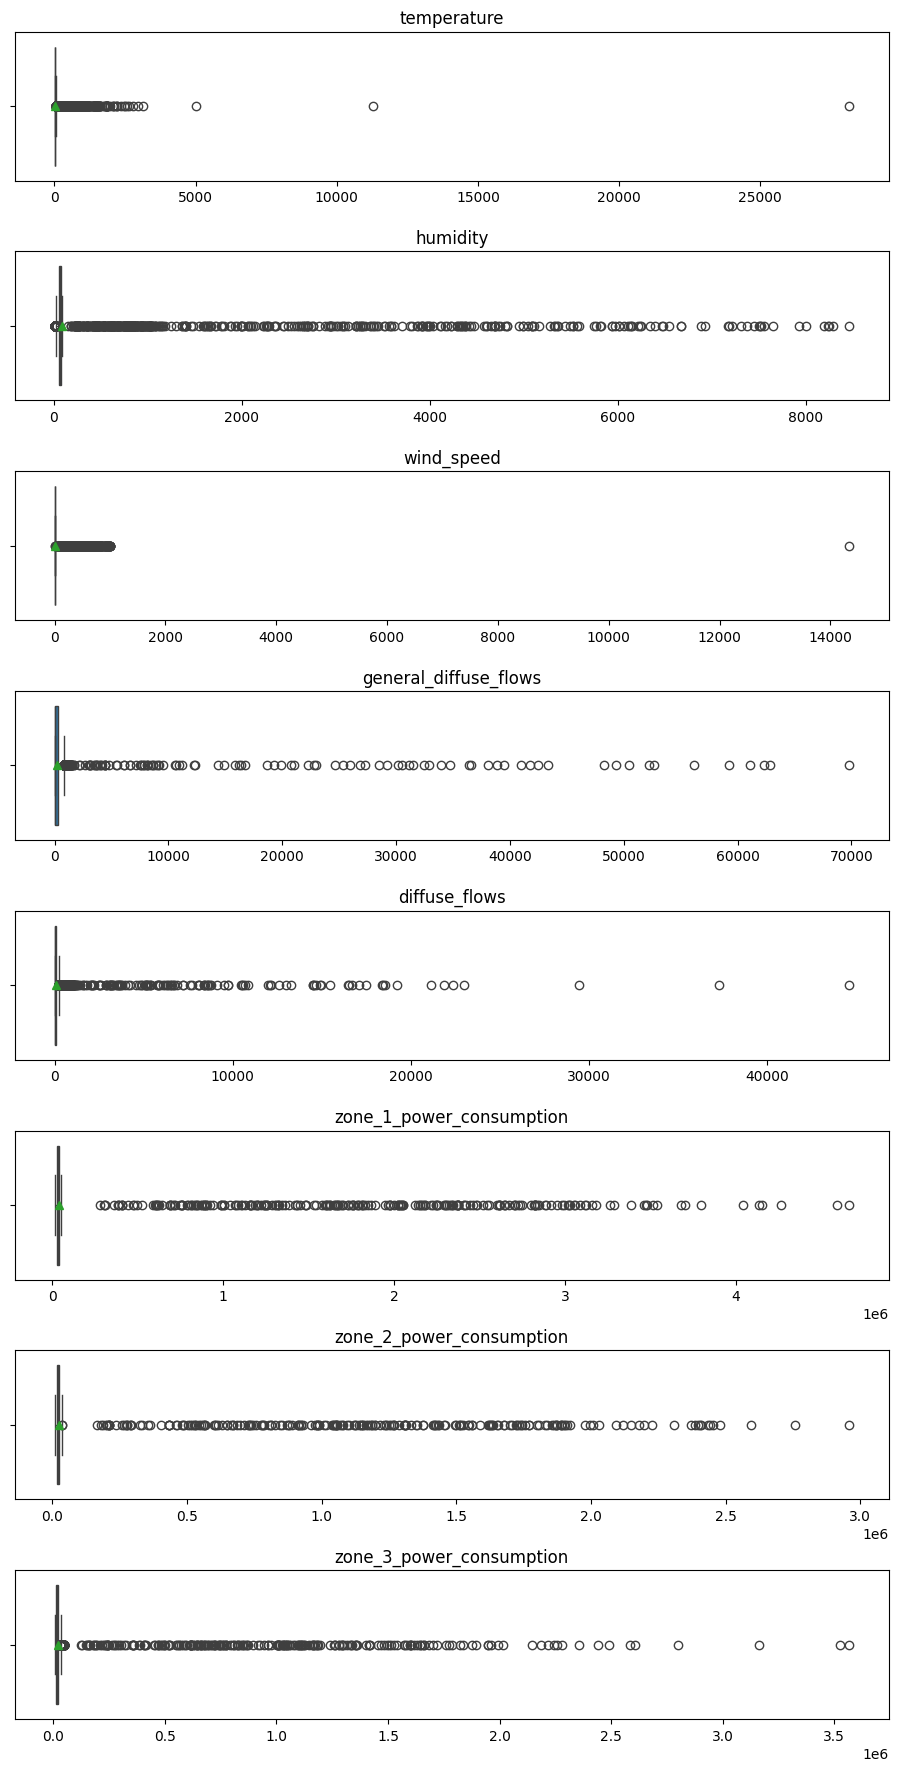

In [189]:
# Se realiza las graficas de boxplot para visualizar outliers
fig, axes = plt.subplots(len(numeric_cols),1, figsize=(10,18))
plt.subplots_adjust(wspace=0.3)
plt.tight_layout(pad=3.0)

axes = axes.ravel()
for col, ax in zip(cleaned_df[numeric_cols], axes):
  sns.boxplot(x=cleaned_df[col], ax=ax, showmeans=True)
  ax.set(title=f'{col}', xlabel=None)

In [190]:
# Skewness de los datos usando la funcion skew()
cleaned_df.skew(numeric_only = True)

temperature                 106.919000
humidity                     17.722259
wind_speed                  123.108086
general_diffuse_flows        34.162720
diffuse_flows                35.916392
zone_1_power_consumption     18.116331
zone_2_power_consumption     19.040392
zone_3_power_consumption     20.625918
dtype: float64

In [191]:
# Kurtosis de los datos usando la funcion kurt()
cleaned_df.kurt(numeric_only = True)

temperature                 16672.503047
humidity                      353.139504
wind_speed                  21434.262910
general_diffuse_flows        1372.258880
diffuse_flows                1810.258752
zone_1_power_consumption      364.214452
zone_2_power_consumption      399.902847
zone_3_power_consumption      514.124271
dtype: float64

In [192]:
# Se genera una funcion para el calculo de los outliers
def outliers(df, str_att_name, method, replace=True,replace_metric=None):
  if method == 'IQR':
    # Se calcula el valor inter-cuartil
    percentile_Q1 = df[str_att_name].quantile(0.25)
    percentile_Q3 = df[str_att_name].quantile(0.75)
    iqr = percentile_Q3 - percentile_Q1
    # Se establece limite superior e inferior
    upper_limit = percentile_Q3 + 1.5 * iqr
    lower_limit = percentile_Q1 - 1.5 * iqr
    # Se determinan los valores atipicos en un nuevo dataframe
    outliers = df[(df[str_att_name] < lower_limit) | (df[str_att_name] > upper_limit)]

  elif  method == 'zscore':
    # Calcula el absoluto del atributo usando z-core
    z = np.abs(stats.zscore(df[str_att_name]))

    # Identifica outliers del atributo usando z-score donde el umbral sea mayor 3 (3 desviaciones estandar)
    threshold = 3
    outliers = df[z > threshold]
  else:
    print('Metodo no valido :  {} %'.format(method))

  if  method == 'IQR' or method == 'zscore':
    print('Total de registros del atrubuto {}:  {:.3f}'.format(str_att_name,(df[str_att_name].shape[0])))
    print('Total de outliers del atrubuto {}:  {:.3f}'.format(str_att_name,(outliers[str_att_name].shape[0])))
    print('Porcentage del atributo {}:  {:.3f} %'.format(str_att_name,(outliers[str_att_name].shape[0]*100) / df[str_att_name].shape[0]))
    
    if replace == True and replace_metric is not None:
      # Reemplaza los outliers por un valor especifico
      if replace_metric == 'mean':
        replace_value = df[str_att_name].mean()
      elif replace_metric == 'median':
        replace_value = df[str_att_name].median()
      elif replace_metric == 'mode':
        replace_value = df[str_att_name].mode()[0]
        
      # Se replaza los outliers con la metrica seleccionada
      df.loc[outliers.index, str_att_name] = replace_value
      print('Outliers del atributo {} reemplazados por:  {}'.format(str_att_name, replace_value))
    else:     
      # Elimina outliers del dataframe
      df.drop(outliers.index.to_list(), inplace=True)
      print('Outliers del atributo {} eliminados'.format(str_att_name))

In [193]:
# Calculo del porcentaje de outliers por cada variable númerica
for col in numeric_cols:
    print('Outlier Analysis for {}:'.format(col))
    outliers(cleaned_df,str(col),'IQR', replace=False,replace_metric='median')
    print(80*'-')  

Outlier Analysis for temperature:
Total de registros del atrubuto temperature:  46928.000
Total de outliers del atrubuto temperature:  590.000
Porcentage del atributo temperature:  1.257 %
Outliers del atributo temperature eliminados
--------------------------------------------------------------------------------
Outlier Analysis for humidity:
Total de registros del atrubuto humidity:  46338.000
Total de outliers del atrubuto humidity:  692.000
Porcentage del atributo humidity:  1.493 %
Outliers del atributo humidity eliminados
--------------------------------------------------------------------------------
Outlier Analysis for wind_speed:
Total de registros del atrubuto wind_speed:  45646.000
Total de outliers del atrubuto wind_speed:  322.000
Porcentage del atributo wind_speed:  0.705 %
Outliers del atributo wind_speed eliminados
--------------------------------------------------------------------------------
Outlier Analysis for general_diffuse_flows:
Total de registros del atrubuto

In [194]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37940 entries, 0 to 46926
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  37940 non-null  datetime64[ns]
 1   temperature               37940 non-null  float64       
 2   humidity                  37940 non-null  float64       
 3   wind_speed                37940 non-null  float64       
 4   general_diffuse_flows     37940 non-null  float64       
 5   diffuse_flows             37940 non-null  float64       
 6   zone_1_power_consumption  37940 non-null  float64       
 7   zone_2_power_consumption  37940 non-null  float64       
 8   zone_3_power_consumption  37940 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.9 MB


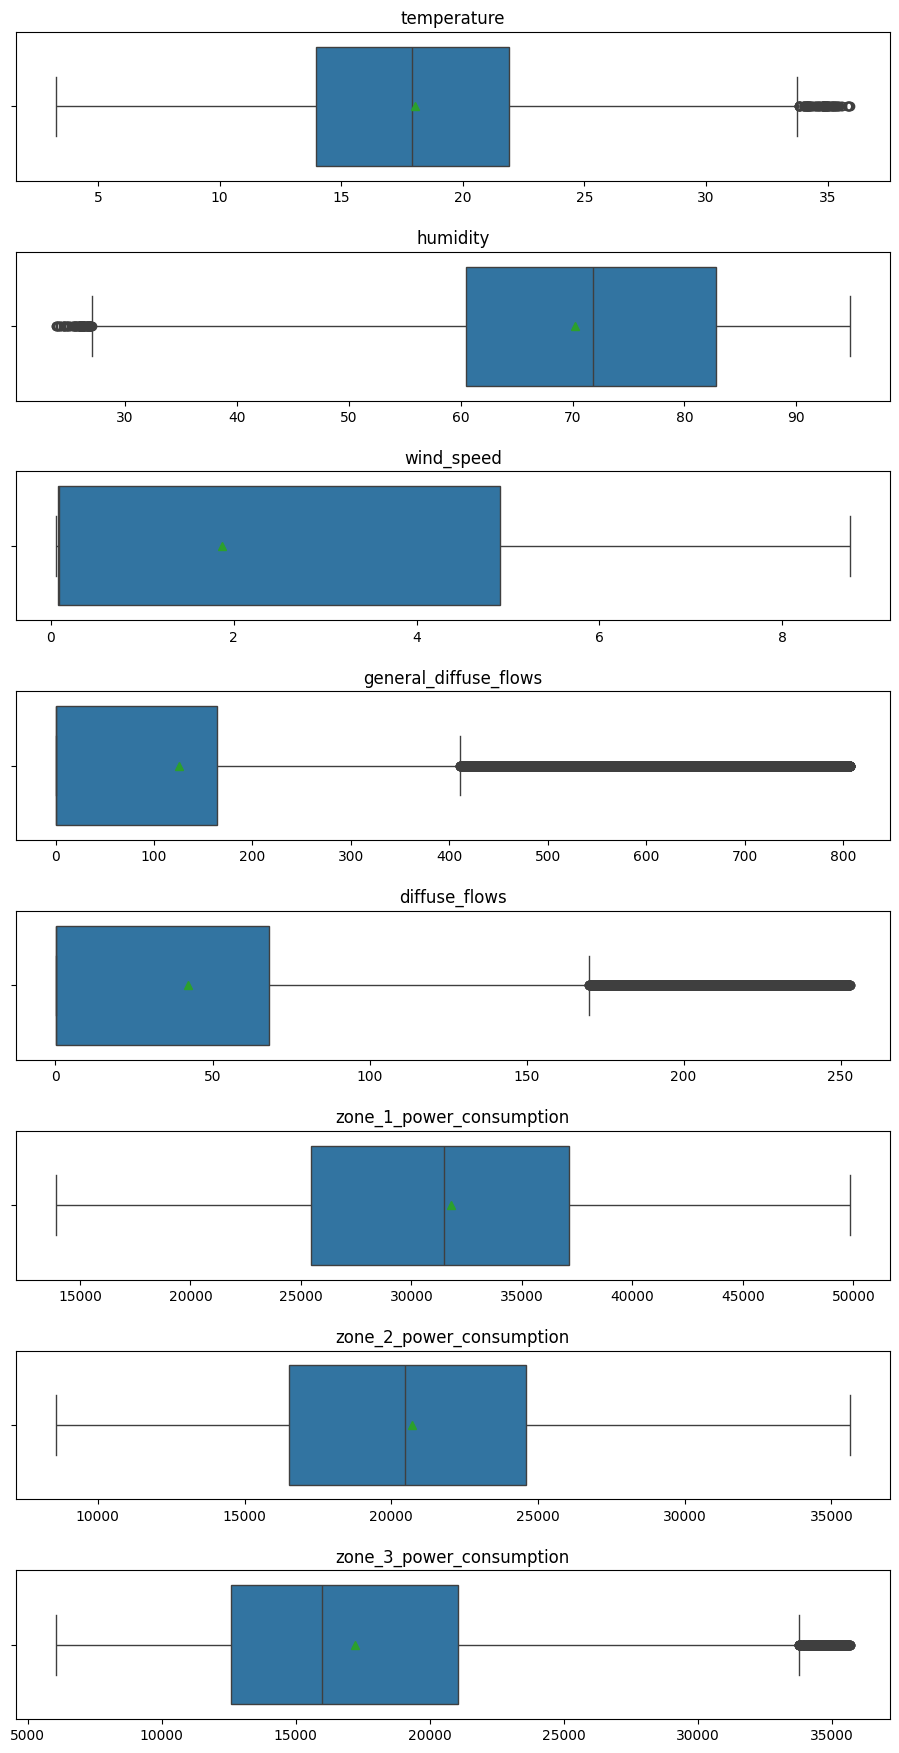

In [195]:
# Se realiza las graficas de boxplot para visualizar outliers
fig, axes = plt.subplots(len(numeric_cols),1, figsize=(10,18))
plt.subplots_adjust(wspace=0.3)
plt.tight_layout(pad=3.0)

axes = axes.ravel()
for col, ax in zip(cleaned_df[numeric_cols], axes):
  sns.boxplot(x=cleaned_df[col], ax=ax, showmeans=True)
  ax.set(title=f'{col}', xlabel=None)

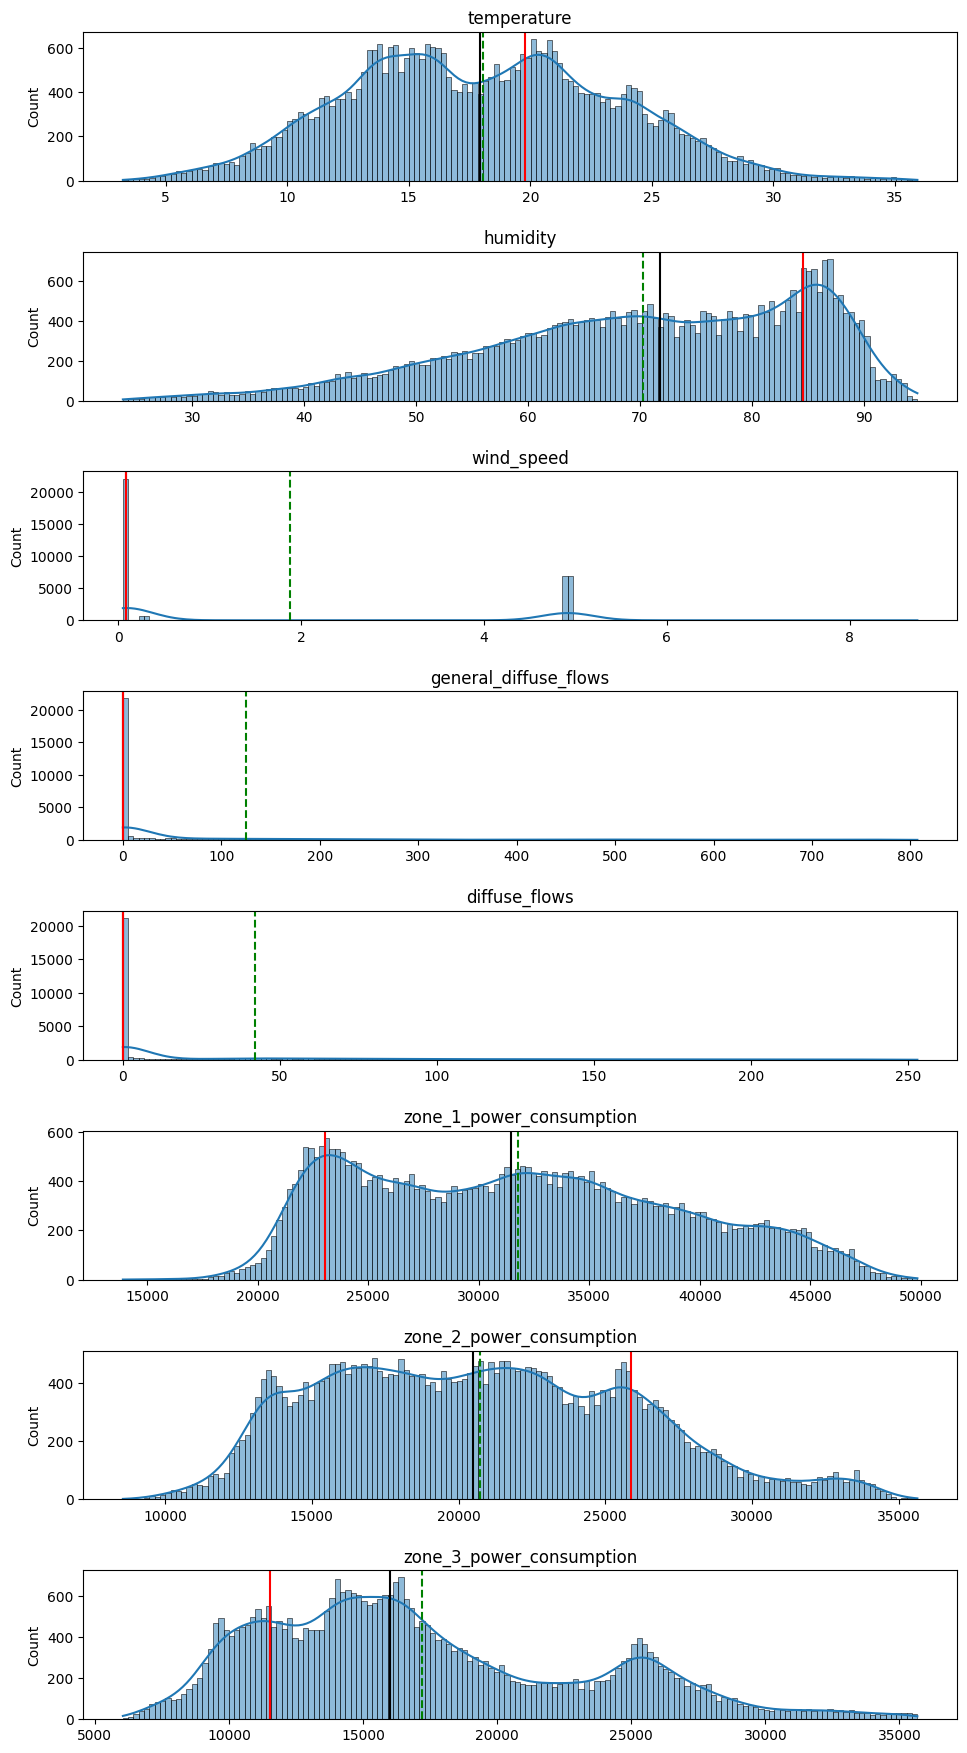

In [196]:
# Se Genera un grafico Matplotlib y Seaborn
fig, axes = plt.subplots(len(numeric_cols),1, figsize=(10,18))
plt.subplots_adjust(wspace=0.3)
plt.tight_layout(pad=3.0)
axes = axes.ravel()

# Se genera un histograma con la media, mediana y moda para una mejor visualizacion
for col, ax in zip(cleaned_df[numeric_cols], axes):
  sns.histplot(x=cleaned_df[col], ax=ax, kde=True, bins=150)
  ax.set(title=f'{col}', xlabel=None)
  ax.ticklabel_format(useOffset=False, style='plain', axis='y')   #y-axis scientific notation turned off
  ax.ticklabel_format(useOffset=False, style='plain', axis='x')   #x-axis scientific notation turned off
  ax.axvline(x=cleaned_df[col].mean(), color='green', linestyle='--')
  ax.axvline(x=cleaned_df[col].median(), color='black', linestyle='-')
  ax.axvline(x=cleaned_df[col].mode().values[0], color='red', linestyle='-')

# **Parte 3**. Ingeniería de Características

In [197]:
data = cleaned_df.copy()

Text(0, 0.5, 'temperature')

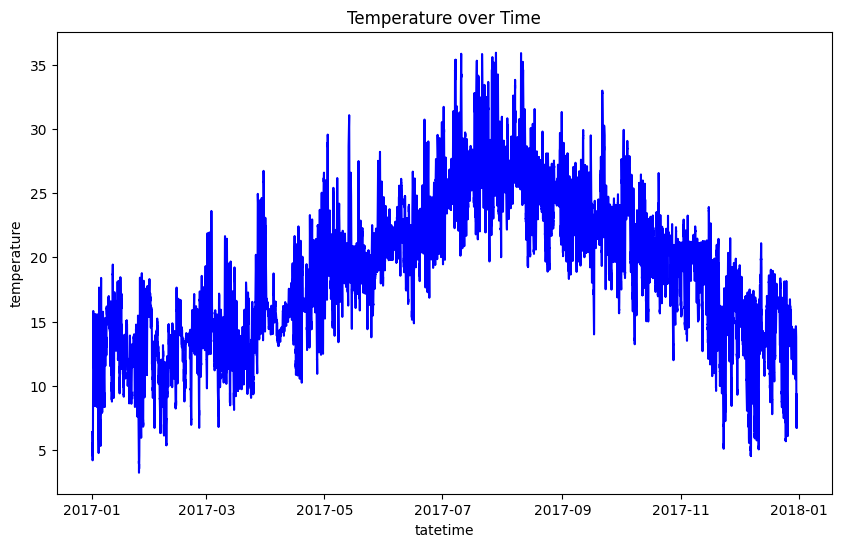

In [198]:
# Temperature
plt.figure(figsize=(10,6))
plt.plot(data['datetime'], data['temperature'], color='blue')
plt.title('Temperature over Time')
plt.xlabel('tatetime')
plt.ylabel('temperature')

Text(0, 0.5, 'humidity')

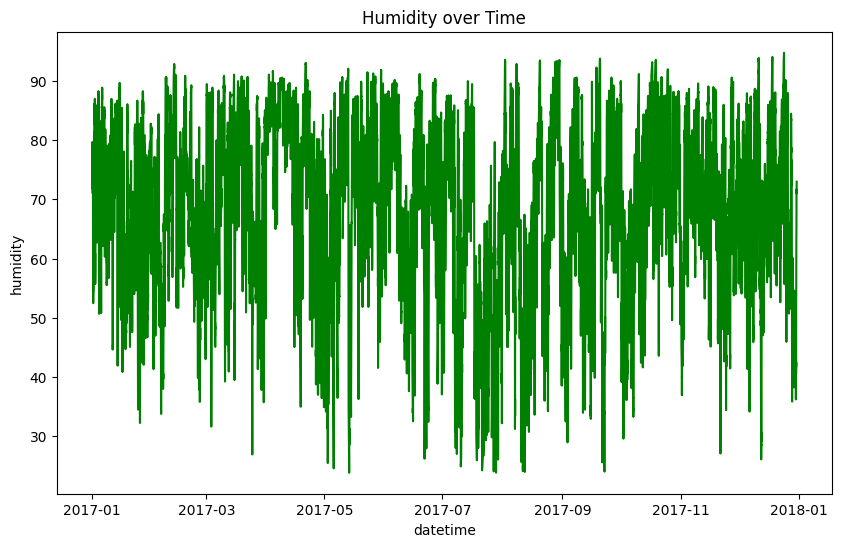

In [199]:
# Humidity
plt.figure(figsize=(10,6))
plt.plot(data['datetime'], data['humidity'], color='green')
plt.title('Humidity over Time')
plt.xlabel('datetime')
plt.ylabel('humidity')

In [200]:
# Lista de columnas de zonas
zones = ['zone_1_power_consumption',
         'zone_2_power_consumption',
         'zone_3_power_consumption']

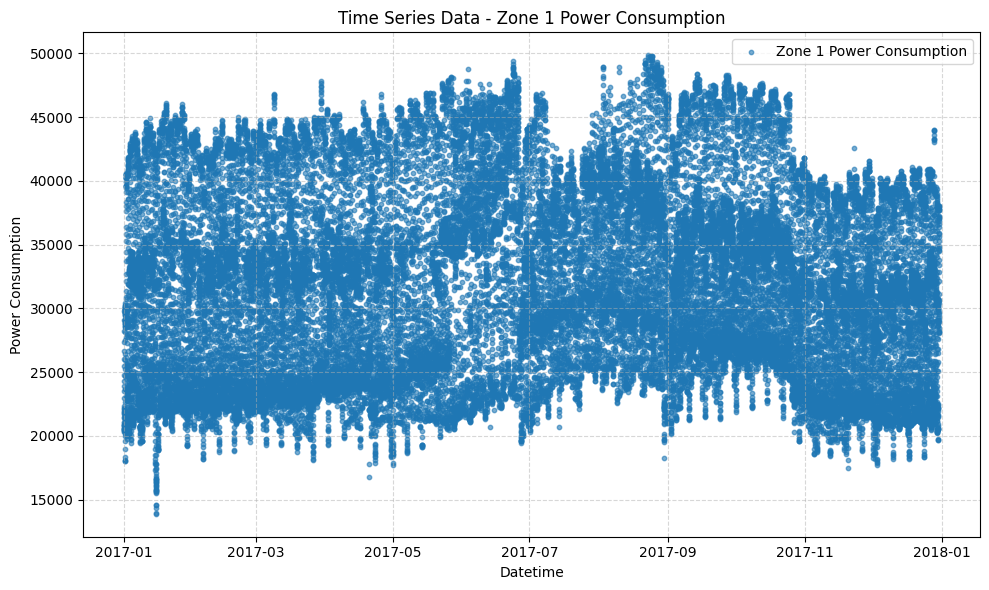

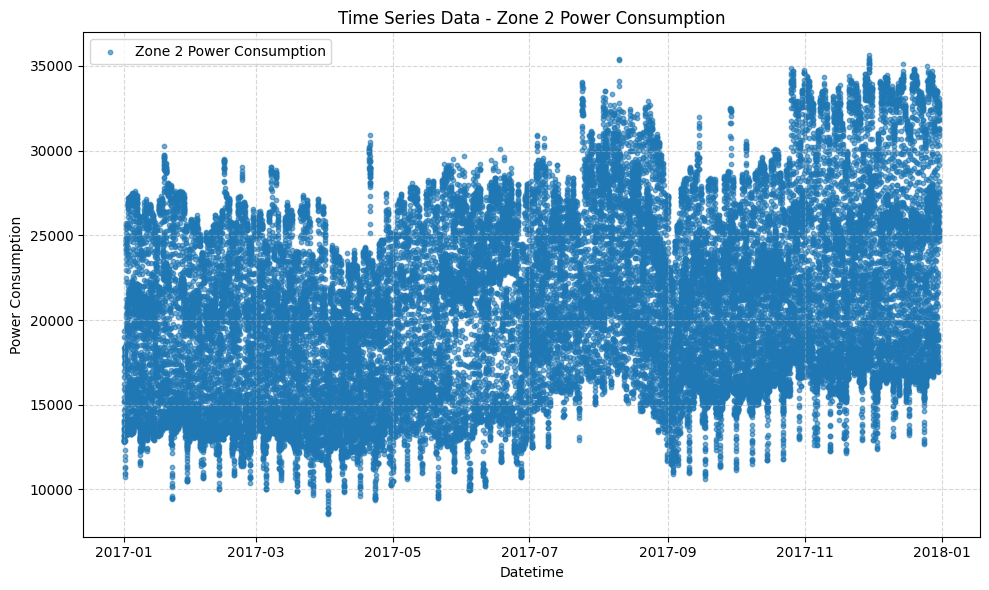

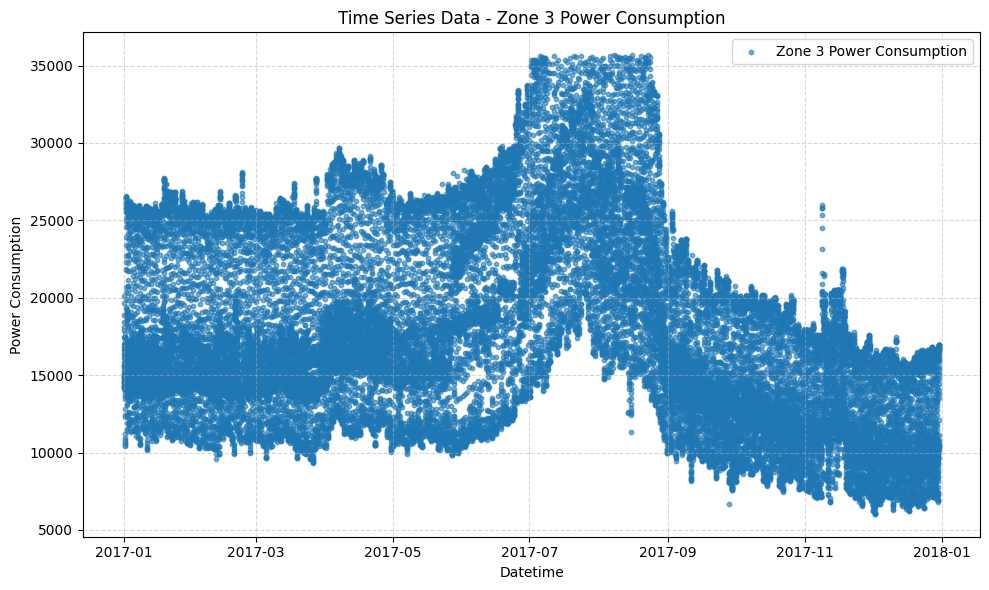

In [201]:
# Loop para graficar cada zona - Power Consumption 
for zone in zones:
    plt.figure(figsize=(10, 6))
    plt.scatter(
        cleaned_df['datetime'],
        cleaned_df[zone],
        label=zone.replace('_', ' ').title(),
        alpha=0.6,
        s=10  # tamaño de los puntos
    )
    
    # Etiquetas y título automáticos
    plt.xlabel('Datetime')
    plt.ylabel('Power Consumption')
    plt.title(f'Time Series Data - {zone.replace("_", " ").title()}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

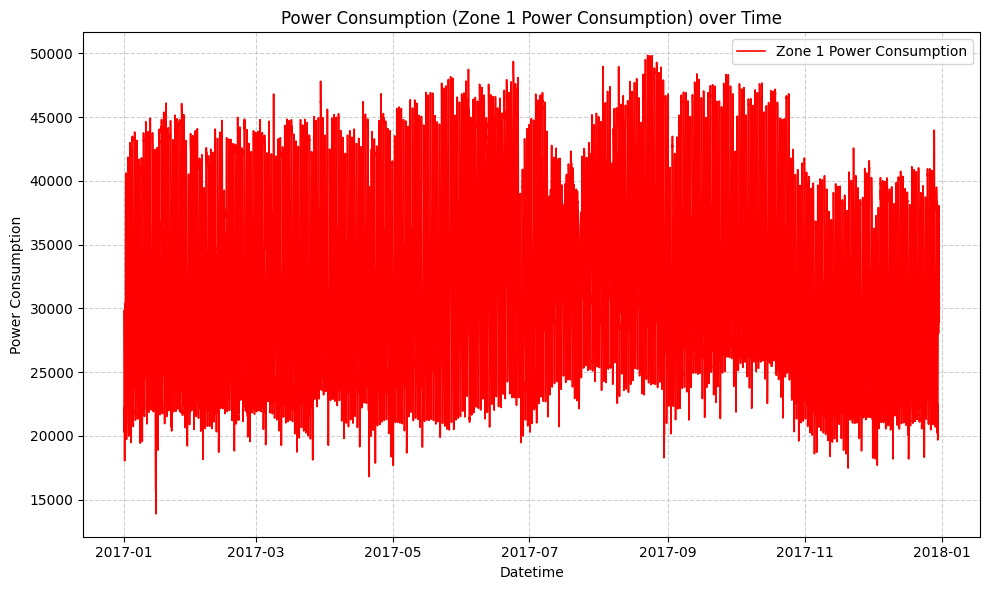

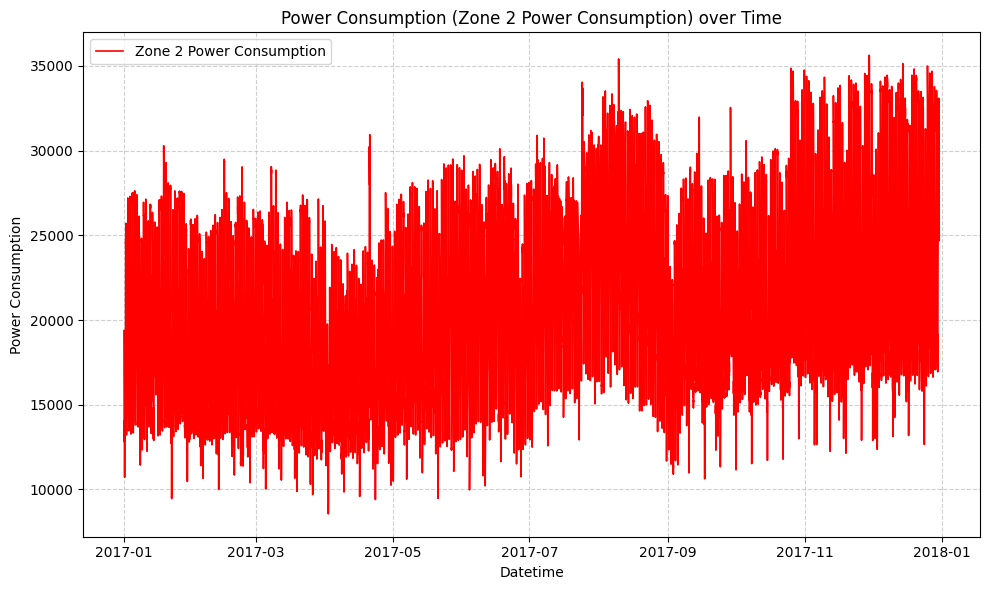

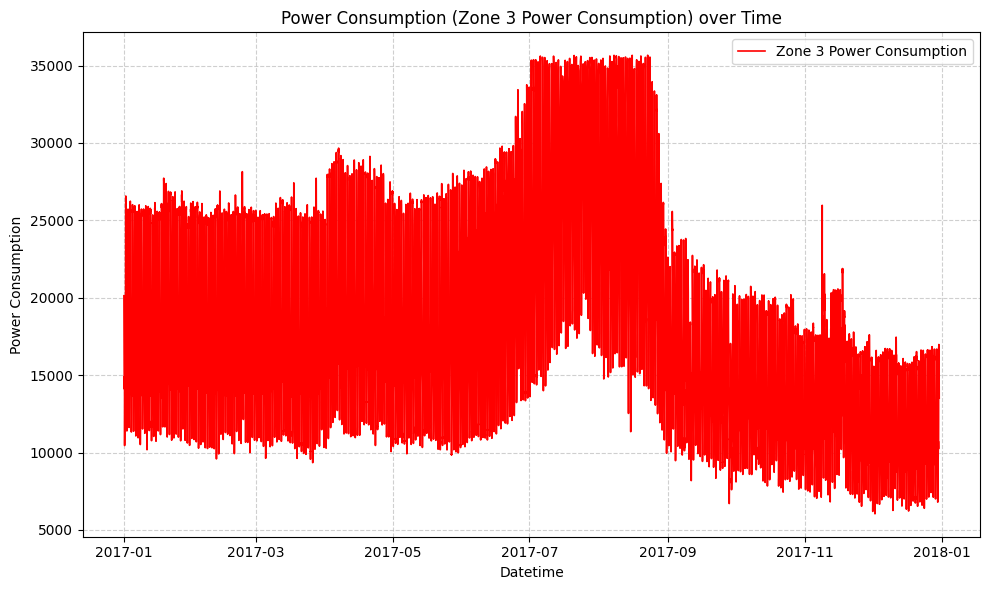

In [202]:
# Loop para graficar cada zona - Power Consumption Sobre linea de tiempo
for zone in zones:
    plt.figure(figsize=(10, 6))
    plt.plot(cleaned_df['datetime'], 
             cleaned_df[zone], 
             label=zone.replace('_', ' ').title(), 
             linewidth=1.2, color='red')
    plt.title(f"Power Consumption ({zone.replace('_', ' ').title()}) over Time")
    plt.xlabel('Datetime')
    plt.ylabel('Power Consumption')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

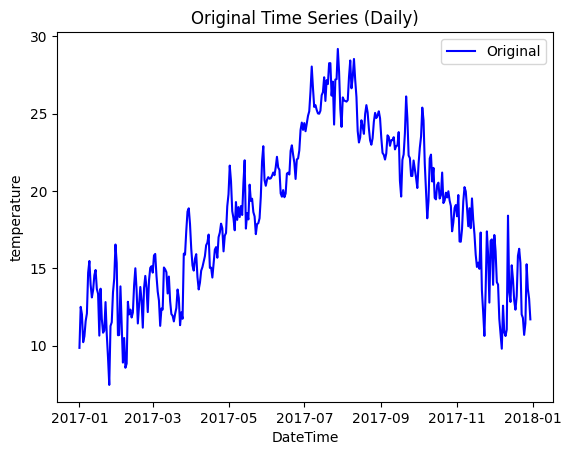

In [203]:
from statsmodels.tsa.seasonal import STL

# Se asume que la columna 'datetime' ya está en formato datetime
variable_of_interest = 'temperature'
df_resampled = data.set_index('datetime').resample('D').mean()

# Se relaiza la descomposición STL sobre los datos re-muestreados
stl_result = STL(df_resampled[variable_of_interest], seasonal=13).fit()

# Grafica de las series de tiempo originales
plt.plot(df_resampled.index, df_resampled[variable_of_interest], label='Original', color='blue')
plt.title('Original Time Series (Daily)')
plt.xlabel('DateTime')
plt.ylabel(variable_of_interest)
plt.legend()

In [204]:
df_resampled

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption
datetime,,,,,,,,
2017-01-01,9.850772,68.628862,0.257366,116.621211,27.880236,28549.608830,17823.826822,18003.173670
2017-01-02,12.502845,71.317069,0.106672,118.040422,25.072802,29122.588498,19641.400272,18122.692148
2017-01-03,12.021545,75.207317,0.076756,122.250431,24.504358,30614.634146,20078.500087,17637.143697
2017-01-04,10.218372,75.957851,0.118901,122.158537,22.721140,30383.759180,19913.493984,17553.664144
2017-01-05,10.605780,71.642033,0.145976,115.240504,27.229276,30796.813832,20042.404923,17668.645313
...,...,...,...,...,...,...,...,...
2017-12-26,11.435568,69.762627,0.083102,104.345483,47.994025,29733.156925,24493.988709,11336.260606
2017-12-27,15.257395,59.396218,0.082025,88.689445,37.949202,30237.868773,25318.814608,11641.345950
2017-12-28,13.665234,62.627969,0.081477,117.102203,33.104242,30277.337096,24634.435697,11135.250497


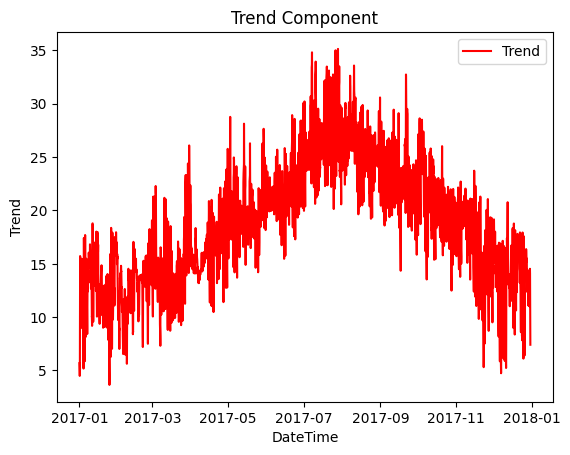

In [205]:
#Se realiza la descomposición estacional usando STL
from statsmodels.tsa.seasonal import seasonal_decompose

# Se realiza la descomposición estacional usando seasonal_decompose
result = seasonal_decompose(data.set_index('datetime')[variable_of_interest], model='additive', period=13)

plt.plot(data['datetime'], result.trend, label='Trend', color='red')
plt.title('Trend Component')
plt.xlabel('DateTime')
plt.ylabel('Trend')
plt.legend()

In [206]:
result

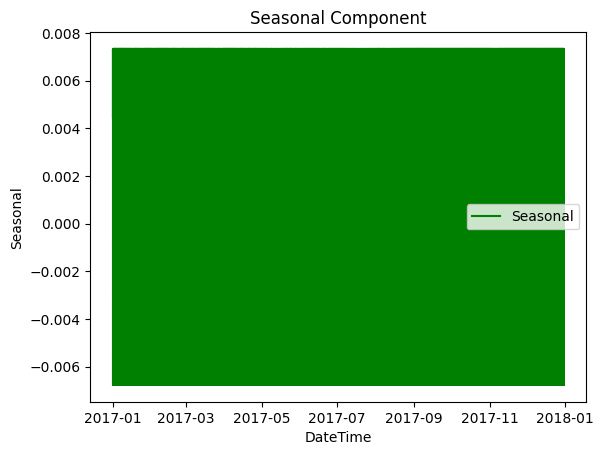

In [207]:
# Se Genera una grafica del componente estacional
plt.plot(data['datetime'], result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('DateTime')
plt.ylabel('Seasonal')
plt.legend()

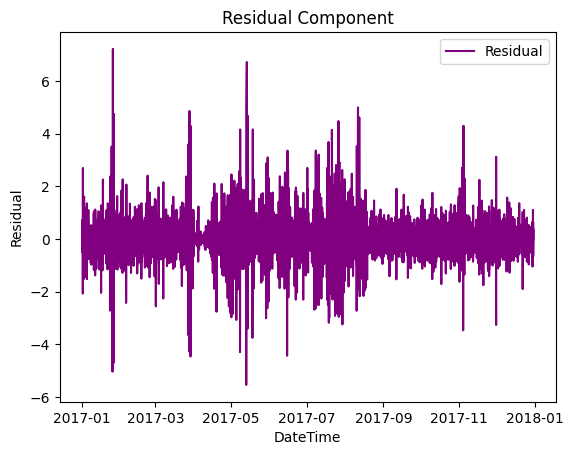

In [208]:
# Se Genera una grafica del componente residual
plt.plot(data['datetime'], result.resid, label='Residual', color='purple')
plt.title('Residual Component')
plt.xlabel('DateTime')
plt.ylabel('Residual')
plt.legend()

# **Parte 4**. Entrenando y Evaluando el Modelo

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [210]:
# Se muestra las columnas del dataset
data.columns

Index(['datetime', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'zone_1_power_consumption',
       'zone_2_power_consumption', 'zone_3_power_consumption'],
      dtype='object')

In [211]:
# Se muestran los registros del dataset
data

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption
0,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
3,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
4,2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
...,...,...,...,...,...,...,...,...,...
46922,2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510
46923,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
46924,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
46925,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [212]:
# Definición de características (X) y objetivo (y)
num_features = ['temperature', 
                'humidity', 
                'wind_speed', 
                'general_diffuse_flows',
                'zone_3_power_consumption',
                'zone_2_power_consumption',
                'diffuse_flows']

target = 'zone_1_power_consumption'

In [213]:
# Dividir los datos en características (X) y objetivo (y)
X = data[num_features]
y = data[target]

In [214]:
# Se genera el pipeline para el preprocesamiento de las columnas numéricas
num_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                             ('minmax', MinMaxScaler())])
                             #("scaler", StandardScaler())])
# Preprocesamiento de las columnas numéricas
pre = ColumnTransformer(transformers = [('num_transf', num_pipe, num_features)],
                        remainder='passthrough')

In [215]:
# Se divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
# Se inicializa el ScandardScaler
#scaler = StandardScaler()
# Fit y transformacion de los datos de entrenamiento
#X_train_scaled = scaler.fit_transform(X_train)
# Transformacion de los datos de prueba
#X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [217]:
# Se inicializa el modelo Linear Regression
model = LinearRegression()
# Se entrena el modelo usando el pipeline
pipe = Pipeline([("prep", pre), ("model", model)])        
pipe.fit(X_train, y_train)                       
#model.fit(X_train_scaled, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [218]:
# Se hacen las predicciones en el conjunto de prueba
#y_pred = model.predict(X_test_scaled)
y_pred = pipe.predict(X_test)

In [219]:
# Se evalua el modelo con la metrica RMSE y R-squared
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Linear Regression):", mse)
r2_R = r2_score(y_test, y_pred)
print(f'R-squared: {r2_R:.4f}')

Mean Squared Error (Linear Regression): 3070.7547460742767
R-squared: 0.8166


## Random Forest Regressor

In [ ]:
# Inicializa el modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Se entrena el modelo usando el pipeline
pipe = Pipeline([("prep", pre), ("model", model)])
pipe.fit(X_train, y_train)
#model.fit(X_train, y_train)

In [ ]:
# Se hacen las predicciones en el conjunto de prueba
#y_pred = model.predict(X_test)
y_pred = pipe.predict(X_test)

In [ ]:
# Se evalua el modelo con la metrica RMSE y R-squared
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Random Forest Regressor):", mse)
r2_R = r2_score(y_test, y_pred)
print(f'R-squared: {r2_R:.4f}')

Mean Squared Error (Random Forest Regressor): 1074.048716466188
R-squared: 0.9776
